Importamos libreria pandas y adecuamos el dataset para su utilización en el modelo. 

In [2]:
import pandas as pd 

In [3]:
data = pd.read_csv('data_ML.csv')

In [4]:
data.head()

,Unnamed: 0,AGE,PTEDUCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB,DX0,DX1,DX2,PTGENDER0,PTGENDER1,PTETHCAT0,PTETHCAT1,PTETHCAT2,PTRACCAT0,PTRACCAT1,PTRACCAT2
0,0,81.3,18,1,20,1,"3,4",AD,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,67.5,10,0,27,0,"3,3",MCI,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,73.7,16,0,29,1,"3,3",CN,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,80.4,13,0,25,1,"3,3",MCI,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,73.9,12,1,24,1,"3,4",AD,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [5]:
data['APOE Genotype'] = data['APOE Genotype'].str.replace(',', '.')
data['APOE Genotype'] = data['APOE Genotype'].astype(float)

In [6]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('DX0', axis = 1)
data = data.drop('DX1', axis = 1)
data = data.drop('DX2', axis = 1)

In [7]:
data.head()

,AGE,PTEDUCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB,PTGENDER0,PTGENDER1,PTETHCAT0,PTETHCAT1,PTETHCAT2,PTRACCAT0,PTRACCAT1,PTRACCAT2
0,81.3,18,1,20,1,3.4,AD,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,67.5,10,0,27,0,3.3,MCI,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,73.7,16,0,29,1,3.3,CN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,80.4,13,0,25,1,3.3,MCI,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,73.9,12,1,24,1,3.4,AD,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['DX'] = encoder.fit_transform(data['DX_SUB'])


In [9]:
data.head()

,AGE,PTEDUCAT,APOE4,MMSE,imputed_genotype,APOE Genotype,DX_SUB,PTGENDER0,PTGENDER1,PTETHCAT0,PTETHCAT1,PTETHCAT2,PTRACCAT0,PTRACCAT1,PTRACCAT2,DX
0,81.3,18,1,20,1,3.4,AD,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,67.5,10,0,27,0,3.3,MCI,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2
2,73.7,16,0,29,1,3.3,CN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,80.4,13,0,25,1,3.3,MCI,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
4,73.9,12,1,24,1,3.4,AD,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


In [10]:
data = data.drop('DX_SUB', axis = 1)

Entrenamos el modelo de arbol de decisión clasificación, dividiendo las muestras. 

In [11]:
from sklearn.model_selection import train_test_split

features = data.drop('DX', axis = 1).values 
target = data['DX'].values

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=50)

Vemos que representa un sobreajuste, ya que el valor de precisión entre la muestra de prueba y entrenamiento es muy diferente.

In [13]:
dt.score(x_train, y_train)


1.0

In [14]:
dt.score(x_test, y_test)

0.582010582010582

Utilizamos GridSearchCV para optimizar los parametros. 

In [15]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}


grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [16]:
grid_object.fit(x_train, y_train)

#Mejor parametro

grid_object.best_params_

{'max_depth': 4, 'min_samples_leaf': 0.02}

Con nuevos parametros, obtenemos valor de precisión más adecuados. 

In [17]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini', random_state=50)
parametros_personalizados = {'max_depth': 4, 'min_samples_leaf': 0.02}

dt.set_params(**parametros_personalizados)

dt.fit(x_train, y_train)

dt.score(x_test, y_test)

0.6825396825396826

In [18]:
dt.score(x_train, y_train)

0.7198177676537585

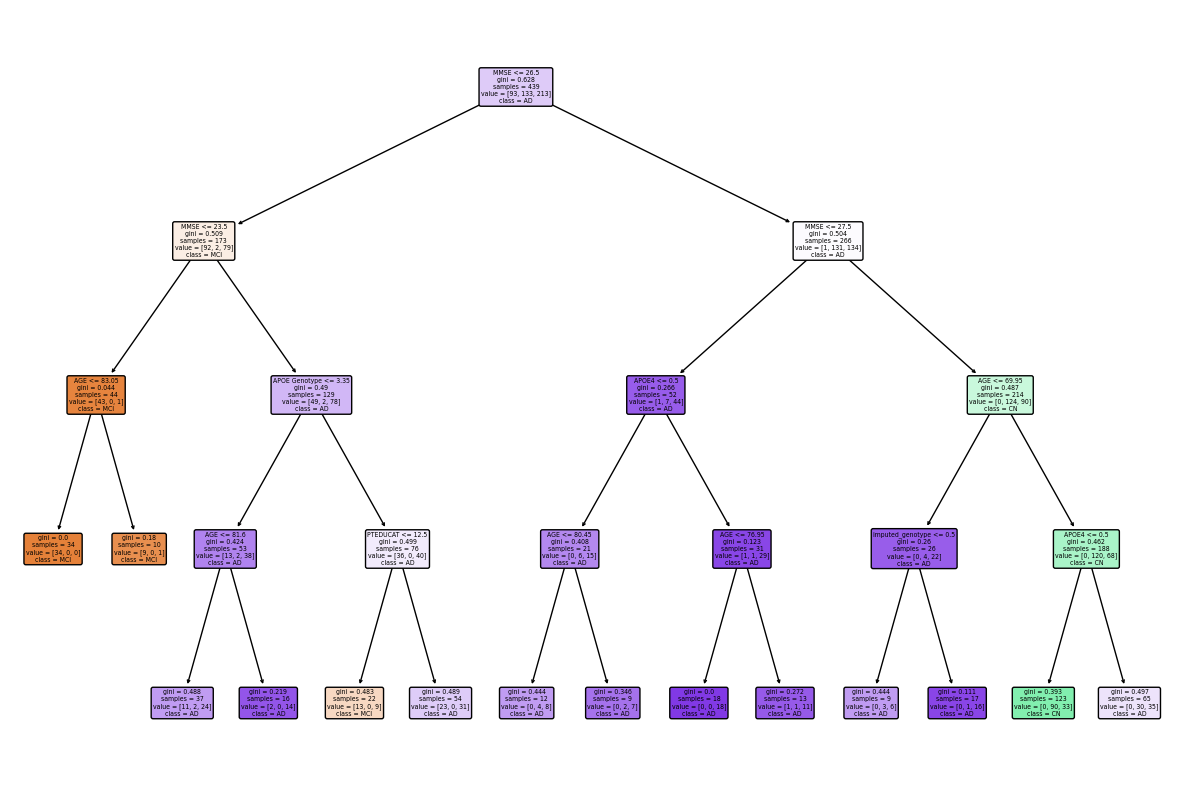

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pylab as plt

feature_names = list(data.columns[:-1])

# Visualizar el árbol de decisión
plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura según tus necesidades
plot_tree(dt, feature_names=feature_names, class_names=["MCI", "CN", "AD"], filled=True, rounded=True)
plt.show()

Se realiza matriz de confusión para obtener un mejor panorama de la ejecución. 

In [20]:
y_pred = dt.predict(x_test)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [22]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(report)

Accuracy: 0.6825396825396826
Confusion Matrix:
[[24  0 16]
 [ 0 32 25]
 [ 2 17 73]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.60      0.73        40
           1       0.65      0.56      0.60        57
           2       0.64      0.79      0.71        92

    accuracy                           0.68       189
   macro avg       0.74      0.65      0.68       189
weighted avg       0.70      0.68      0.68       189

